In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from numpy import random

In [3]:
from obs import h_operator
op = "cubic"
sigma = 1.0

In [69]:
nmem = 20
nx = 40
#xf = random.normal(0, scale=sigma, size=nx*nmem).reshape(nx, nmem)
xf = random.rand(nx*nmem).reshape(nx, nmem)
xf = (xf - np.mean(xf))*sigma

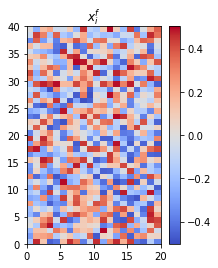

In [70]:
cmap = "coolwarm"
x = np.arange(nx+1)
y = np.arange(nmem+1)
vlim = max(np.max(xf), abs(np.min(xf)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, xf, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$x^f_i$")
plt.rc('text', usetex=False)
plt.show()

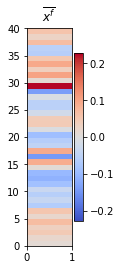

In [71]:
xf_ = np.mean(xf, axis=1)[:, None]
y_ = np.arange(1+1)
vlim = max(np.max(xf_), abs(np.min(xf_)))
plt.figure(figsize=(1, 4))
mappable = plt.pcolor(y_, x, xf_, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$\overline{x^f}$")
plt.rc('text', usetex=False)
plt.show()

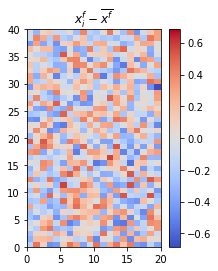

In [72]:
dxf = xf - xf_
vlim = max(np.max(dxf), abs(np.min(dxf)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dxf, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$x^f_i-\overline{x^f}$")
plt.rc('text', usetex=False)
plt.show()

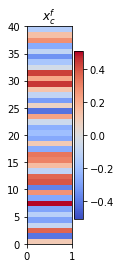

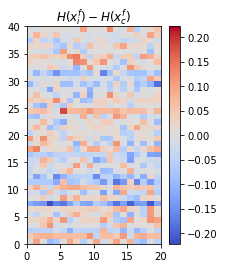

In [76]:
#xfc = random.normal(0, scale=sigma, size=nx)[:, None]
xfc = random.rand(nx)[:, None]
xfc = (xfc - np.mean(xfc))*sigma
vlim = max(np.max(xfc), abs(np.min(xfc)))
plt.figure(figsize=(1, 4))
mappable = plt.pcolor(y_, x, xfc, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$x^f_c$")
plt.rc('text', usetex=False)
plt.show()
dyc = h_operator(xf, operator=op) - h_operator(xfc, operator=op)
vlim = max(np.max(dyc), abs(np.min(dyc)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dyc, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$H(x^f_i)-H(x^f_c)$")
plt.rc('text', usetex=False)
plt.show()

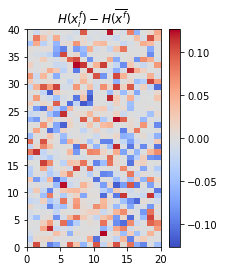

In [77]:
dy = h_operator(xf, operator=op) - h_operator(xf_, operator=op)
vlim = max(np.max(dy), abs(np.min(dy)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dy, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$H(x^f_i)-H(\overline{x^f})$")
plt.rc('text', usetex=False)
plt.show()

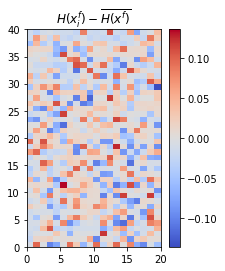

In [78]:
dyb = h_operator(xf, operator=op) - np.mean(h_operator(xf, operator=op), axis=1)[:, None]
vlim = max(np.max(dyb), abs(np.min(dyb)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dyb, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$H(x^f_i)-\overline{H(x^f)}$")
plt.rc('text', usetex=False)
plt.show()

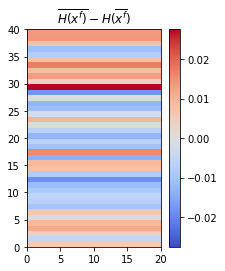

In [79]:
dif = dy - dyb
vlim = max(np.max(dif), abs(np.min(dif)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dif, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$\overline{H(x^f)}-H(\overline{x^f})$")
plt.rc('text', usetex=False)
plt.show()

In [88]:
import scipy.optimize as spo
from scipy.optimize import rosen, rosen_der
x0 = random.rand(10)
res = spo.minimize(rosen, x0, method='L-BFGS-B', jac=rosen_der, options={'disp':0})

In [90]:
res.keys()

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv'])

In [94]:
res.x

array([0.99999983, 0.99999986, 1.00000023, 1.00000025, 1.00000009,
       1.0000001 , 1.00000014, 0.99999984, 0.99999958, 0.99999918])

In [101]:
from mlef import calc_j as mlef_calcj
from mlef import calc_grad_j as mlef_calcg
from mlef import precondition

In [141]:
nx = 81
nmem = 4
xc = random.normal(0, scale=1.0, size=nx)
y = random.normal(1.0, scale=0.5, size=nx)
pf = random.normal(0, scale=1.0, size=nx*nmem).reshape(nx,nmem)
htype = {"operator":"cubic", "perturbation":"mlef", "gamma":1}
rmat = np.eye(nx)*1.0
rinv = rmat @ rmat.T
dh = h_operator(xc[:, None]+pf, htype["operator"], htype["gamma"]) - h_operator(xc, htype["operator"], htype["gamma"])[:, None]
zmat = rmat @ dh
tmat, heinv, condh = precondition(zmat)
gmat = pf @ tmat
x0 = random.rand(nmem)*0.0
args_j = (xc, pf, y, tmat, gmat, heinv, rinv, htype)
print(mlef_calcj(x0, *args_j))
mlef_calcg(x0, *args_j)

eigenvalues=[2729.32246714 4836.17482391 7681.63398515 8998.83274764]
cond(hessian)=3.2962526792926523
488.5898061862267


array([-157.94348989,  210.88545583, 1095.8103816 ,  910.23273651])

In [142]:
spo.check_grad(mlef_calcj, mlef_calcg, x0, *args_j)

1442.02613392608

In [134]:
from mlefb import calc_j as mlefb_calcj
from mlefb import calc_grad_j as mlefb_calcg
from mlefb import precondition as preconditionb

In [143]:
eps = 1e-6
htype = {"operator":"cubic", "perturbation":"mlefb", "gamma":1}
args_b = (xc, pf, y, preconditionb, eps, rmat, htype)
print(mlefb_calcj(x0, *args_b))
mlefb_calcg(x0, *args_b)

488.58972347487025


array([-640.0187628 , -248.67237122,  638.85797912,  249.83315503])

In [144]:
spo.check_grad(mlefb_calcj, mlefb_calcg, x0, *args_b)

165.42316061594917

## Nonlinear observation operators

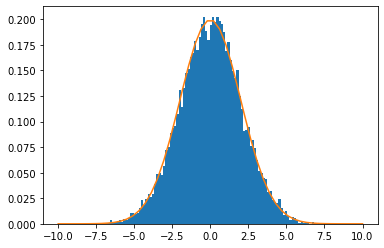

In [8]:
sigma = 2.0
r = random.normal(0.0, scale=sigma, size=10000)
x = np.linspace(-100,100)
x = x * 0.1
y = np.exp(-(x/sigma)**2/2)/np.sqrt(2*np.pi)/sigma
plt.hist(r, bins=100, density=True)
plt.plot(x, y)
plt.show()

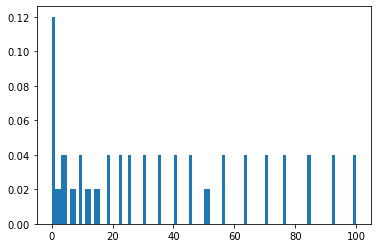

In [9]:
from obs import h_operator
op = "quadratic"
r2 = h_operator(x, op, sigma)
plt.hist(r2, bins=100, density=True)
plt.show()

## Lorenc(2003), Bowler et al.(2013)の再現

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from numpy import random

(1000, 2)


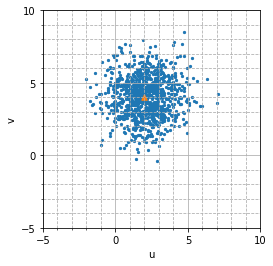

In [2]:
wmean = np.array([2.0,4.0])
wstdv = np.array([2.0,2.0])
wind = random.multivariate_normal(wmean, np.diag(wstdv), size=1000)
print(wind.shape)
x = np.arange(-5,11)
fig, ax = plt.subplots()
ax.scatter(wind[:,0], wind[:,1], s=5)
ax.scatter(wmean[0], wmean[1], s=30, marker='^')
ax.set_xlabel("u")
ax.set_ylabel("v")
ax.set_aspect("equal")
ax.set_xticks(x[::5])
ax.set_yticks(x[::5])
ax.set_xticks(x, minor=True)
ax.set_yticks(x, minor=True)
ax.grid(which="major")
ax.grid(which="minor", linestyle="dashed")
plt.show()

In [3]:
xf = wind.transpose()
xf_ = np.mean(xf, axis=1)
y = np.array([3.0]) #observation [m/s]
sig = 0.3 #observation error [m/s]
dx = 1.0
binv = np.diag(1.0/wstdv)
rmat = np.array([1.0 / sig]).reshape(-1,1)
rinv = np.array([1.0 / sig / sig]).reshape(-1,1)

In [4]:
theta = np.linspace(0.0, 2.0*np.pi, 360)
rmin = y - sig
rmax = y + sig
xmin = rmin*np.cos(theta)
ymin = rmin*np.sin(theta)
xmax = rmax*np.cos(theta)
ymax = rmax*np.sin(theta)
#fig, ax = plt.subplots()
#ax.plot(xmin, ymin)
#ax.plot(xmax, ymax)
#ax.set_aspect("equal")
#plt.show()

In [5]:
from enkf import analysis
htype = {"operator":"speed","perturbation":"etkf","gamma":1}

In [5]:
import obs
print(xf.shape)
yobs = obs.h_operator(xf, htype["operator"], htype["gamma"])
print(yobs.shape)
yobs_ = obs.h_operator(xf_, htype["operator"], htype["gamma"])
print(yobs_.shape)
jh = obs.dhdx(xf_, htype["operator"], htype["gamma"])
print(jh.shape)

(2, 1000)
(1, 1000)
(1,)
(1, 2)


In [6]:
xa, xa_, pa, chi2, ds, condh = analysis(xf, xf_, y, sig, dx, htype, tlm=False)

save_dh=False cycle0
0.0010009561833695816


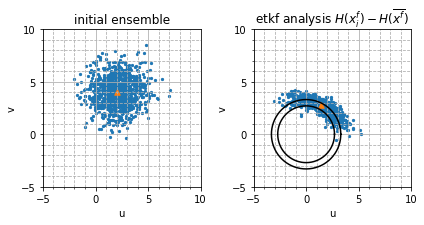

In [7]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xa_[0], xa_[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"etkf analysis $H(x^f_i)-H(\overline{x^f})$")
#ax[1].set_title(r"etkf analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("etkf-fh2_speed.png")
plt.show()

In [8]:
htype = {"operator":"speed","perturbation":"srf","gamma":1}
xa, xa_, pa, chi2, ds, condh = analysis(xf, xf_, y, sig, dx, htype, tlm=False)

save_dh=False cycle0
0.0010009561833695816


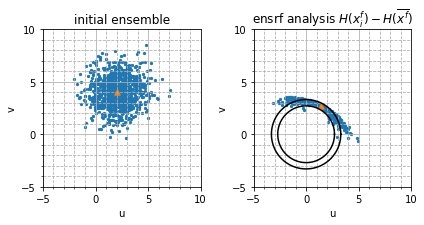

In [9]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xa_[0], xa_[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"ensrf analysis $H(x^f_i)-H(\overline{x^f})$")
#ax[1].set_title(r"ensrf analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("ensrf-fh2_speed.png")
plt.show()

In [5]:
from mlef import analysis as analysis_mlef
htype = {"operator":"speed","perturbation":"mlef","gamma":1}

In [6]:
xc, pa, chi2, ds, condh = analysis_mlef(xf, xf_, y, rmat, rinv, htype)
xa = xc[:, None] + pa

save_dh=False
save_hist=False cycle100
check_grad=738.1139687110257
success=False message=Desired error not necessarily achieved due to precision loss.
J=7.682e+00 dJ=5.702e+02 nit=1
x=[-0.13209054 -0.26342516]
0.9999527518867877


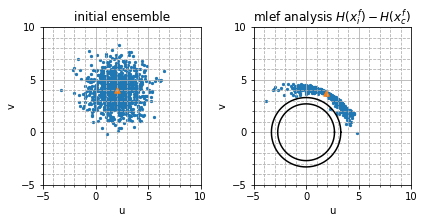

In [7]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xc[0], xc[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"mlef analysis $H(x^f_i)-H(x^f_c)$")
#ax[1].set_title(r"etkf analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("mlef_speed.png")
plt.show()

In [8]:
from mlefb import analysis as analysis_mlefb
htype = {"operator":"speed","perturbation":"mlefb","gamma":1}

In [9]:
xa, xa_, pa, chi2, da, condh = analysis_mlefb(xf, xf_, y, rmat, rinv, htype)

save_dh=False
save_hist=False cycle100
check_grad=3.369668192857404e-05
success=True message=Optimization terminated successfully.
J=5.264e-01 dJ=8.406e-07 nit=4
x=[-0.64338912 -1.25039153]
0.9561897475761502


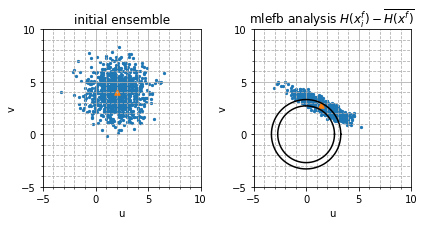

In [10]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xa_[0], xa_[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"mlefb analysis $H(x^f_i)-\overline{H(x^f)}$")
#ax[1].set_title(r"etkf analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("mlefb_speed.png")
plt.show()

In [11]:
from mleft import analysis as analysis_mleft
htype = {"operator":"speed","perturbation":"mleft","gamma":1}

In [12]:
xa, xa_, pa, chi2, da, condh = analysis_mleft(xf, xf_, y, rmat, rinv, htype)

save_dh=False
save_hist=False cycle100
check_grad=5.880665138590161
success=False message=Desired error not necessarily achieved due to precision loss.
J=1.424e+00 dJ=7.041e+00 nit=1
x=[-0.6137306  -1.23233363]
0.9969202611247941


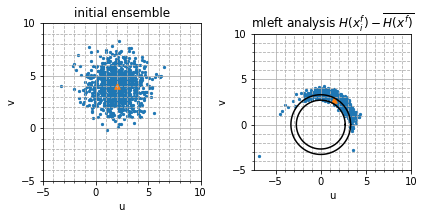

In [13]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xa_[0], xa_[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"mleft analysis $H(x^f_i)-\overline{H(x^f)}$")
#ax[1].set_title(r"etkf analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("mleft_speed.png")
plt.show()

In [14]:
from var import analysis as analysis_var
htype = {"operator":"speed","perturbation":"var","gamma":1}

In [15]:
xa = np.zeros_like(xf)
nmem = xf.shape[1]
for i in range(nmem):
    xa[:,i], chi2 = analysis_var(xf[:,i], binv, y, rinv, htype)
xa_ = np.mean(xa, axis=1)

success=True message=Optimization terminated successfully.
J=2.910e+00 dJ=7.876e-15 nit=2
success=True message=Optimization terminated successfully.
J=2.742e-01 dJ=7.550e-16 nit=2
success=True message=Optimization terminated successfully.
J=2.453e-02 dJ=3.103e-16 nit=1
success=True message=Optimization terminated successfully.
J=2.433e-01 dJ=1.155e-15 nit=2
success=True message=Optimization terminated successfully.
J=1.588e-02 dJ=1.388e-16 nit=1
success=True message=Optimization terminated successfully.
J=8.895e-01 dJ=2.473e-15 nit=2
success=True message=Optimization terminated successfully.
J=6.408e-01 dJ=3.301e-15 nit=2
success=True message=Optimization terminated successfully.
J=7.801e-01 dJ=1.388e-15 nit=2
success=True message=Optimization terminated successfully.
J=3.921e-01 dJ=9.421e-16 nit=2
success=True message=Optimization terminated successfully.
J=5.438e-01 dJ=4.432e-15 nit=2
success=True message=Optimization terminated successfully.
J=2.039e-01 dJ=1.111e-16 nit=2
success=Tr

success=True message=Optimization terminated successfully.
J=9.880e-01 dJ=1.908e-15 nit=2
success=True message=Optimization terminated successfully.
J=7.674e-03 dJ=3.054e-16 nit=1
success=True message=Optimization terminated successfully.
J=3.293e-01 dJ=1.196e-15 nit=2
success=True message=Optimization terminated successfully.
J=1.140e-01 dJ=1.166e-15 nit=2
success=True message=Optimization terminated successfully.
J=6.743e+00 dJ=3.398e-15 nit=3
success=True message=Optimization terminated successfully.
J=3.856e-01 dJ=1.456e-15 nit=2
success=True message=Optimization terminated successfully.
J=1.876e+00 dJ=3.280e-15 nit=2
success=True message=Optimization terminated successfully.
J=8.564e-01 dJ=5.765e-15 nit=2
success=True message=Optimization terminated successfully.
J=3.330e-01 dJ=1.691e-15 nit=2
success=True message=Optimization terminated successfully.
J=3.938e-02 dJ=4.775e-16 nit=1
success=True message=Optimization terminated successfully.
J=2.149e+00 dJ=1.231e-14 nit=2
success=Tr

success=True message=Optimization terminated successfully.
J=7.677e-01 dJ=7.850e-16 nit=2
success=True message=Optimization terminated successfully.
J=1.598e-02 dJ=1.756e-15 nit=1
success=True message=Optimization terminated successfully.
J=1.331e-01 dJ=9.007e-16 nit=2
success=True message=Optimization terminated successfully.
J=2.798e+00 dJ=9.486e-15 nit=2
success=True message=Optimization terminated successfully.
J=4.615e-01 dJ=1.336e-15 nit=2
success=True message=Optimization terminated successfully.
J=4.917e-01 dJ=6.661e-16 nit=2
success=True message=Optimization terminated successfully.
J=6.276e-01 dJ=2.772e-15 nit=2
success=True message=Optimization terminated successfully.
J=5.125e-01 dJ=2.836e-15 nit=2
success=True message=Optimization terminated successfully.
J=2.202e+00 dJ=3.527e-15 nit=2
success=True message=Optimization terminated successfully.
J=7.684e-01 dJ=1.688e-15 nit=2
success=True message=Optimization terminated successfully.
J=4.725e-01 dJ=1.324e-15 nit=2
success=Tr

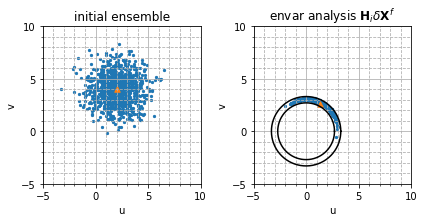

In [16]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xa_[0], xa_[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"envar analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("envar_speed.png")
plt.show()